### CRIME SPREAD DYNAMICS

Il seguente progetto si propone di indagare la dinamica di diffusione del crimine attraverso un approccio epidemiologico. 
Il modello su cui si sviluppa lo studio è un modello a compartimenti composto di 5 classi: S, E1, E2, I ed R.
I suscettibili (S), cioè coloro che non hanno commesso alcun crimine possono transire al compartimento E1 (quello di coloro che hanno commesso un reato) in due modi differenti: in maniera spontanea oppure in maniera proporzionale al numero di persone "infette" (E1+E2) con cui entrano in conttatto.
Dal compartimento E1 si può transire al compartimento I (incarcerati) con un rate di incarcerazione oppure al compartimento R (released/recovered).
Infine dal compartimento R è possibile transire al compartimento E2 (composto dai recidivi che commettono un crimine anche dopo l'esperienza dell'incarcerazione) che poi possono ritornare ad R o essere incarcerati nuovamente con un rate di re-incarcerazione.
Partendo da un sistema a popolazione fissata si procede ad illustrare l'evoluzione temporale della dinamica 'epidemica', validare il calcolo analitico degli stati stazionari calcolandone la stabilita e infine calcolare l'R0 attraverso la Next Generation Matrix.
Infine si valuta l'impatto del parametro che regola il flusso esogeno da S ad E1 e della soglia epidemiologica sull'evoluzione del sistema.
Per concludere si ripetono le stesse considerazioni introducendo nel sistema la demografia, definendo un tasso di natalità e mortalità che si assumono uguali per semplicità.

In [74]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import sympy as sp
from scipy.optimize import fsolve
from numpy.linalg import inv, eigvals

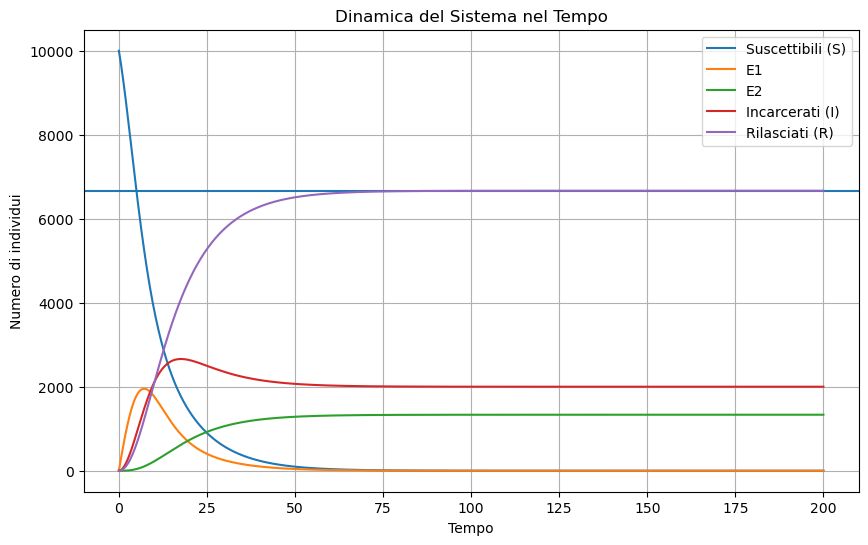

In [75]:
#Studio dell'evoluzione temporale del sistema, e verifico che lo stato stazionario che ho trovato analiticamente sia corretto

#scrivo i parametri e le condizioni iniziali
Lambda = 0
beta11 = 0.3
beta10 = 0.05
d = 0
theta1 = 0.2
gamma1 = 0.1
theta3 = 0.05
theta2 = 0.15
gamma3 = 0.1
gamma2 = 0.1
delta = 0
S0 = 10000
E1_0 = 0
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.axhline(S0/(1+(theta3/(theta2 + gamma3))* (1+ theta2/gamma2)))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")

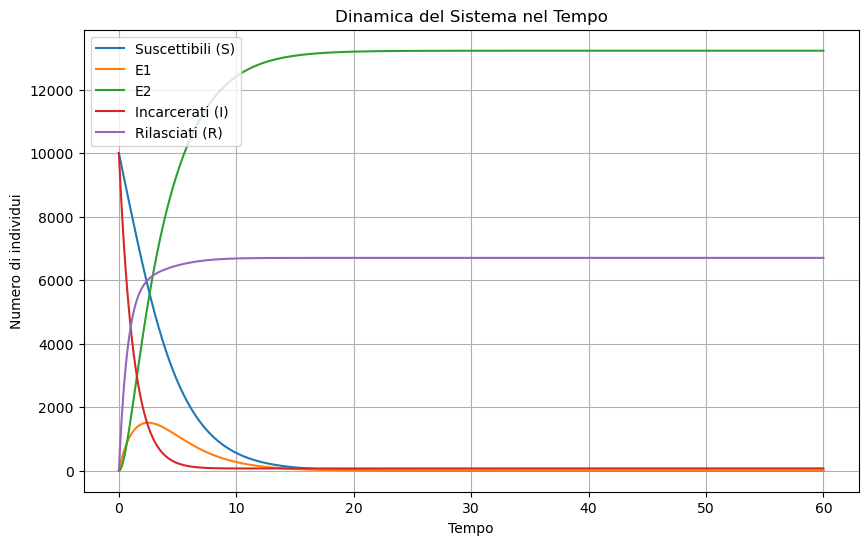

In [76]:
#Studio l'evoluzione temporale del sistema con i parametri citati nell'articolo da cui ho preso spunto per questo progetto (arXiv:2410.01607v1 [physics.soc-ph] 2 Oct 2024)

# Parametri e condizioni iniziali
Lambda = 0
beta11 = 0.24
beta10 = 0.18
d = 0
theta1 = 0.0035
gamma1 = 0.9933
theta3 = 0.6666
theta2 = 0.0044
gamma3 = 0.3334
gamma2 = 0.794
delta = 0
S0 = 10000
E1_0 = 0
E2_0 = 0
I0 = 10000
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 60)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


In [77]:
#Trovo lo stato stazionario
def steady_state(y):
    E1, E2, I, R = y  
    S = 10000 - (E1 + E2 + I + R)  # Vincolo sulla popolazione
    
    eq1 = - beta11 * S * (E1 + E2) / 10000 - beta10 * S
    eq2 = beta11 * S * (E1 + E2) / 10000 + beta10 * S - (theta1 + gamma1) * E1
    eq3 = theta3 * R - (theta2 + gamma3 ) * E2
    eq4 = theta1 * E1 + theta2 * E2 - gamma2 * I

    return [eq1, eq2, eq3, eq4]

# Stima iniziale
N_fixed = 10000
N_last = sum([S[-1], E1[-1], E2[-1], I[-1], R[-1]])
y_guess = [E1[-1] * (N_fixed / N_last), E2[-1] * (N_fixed / N_last),
           I[-1] * (N_fixed / N_last), R[-1] * (N_fixed / N_last)]

# Risolviamo il sistema
steady_sol = fsolve(steady_state, y_guess)
E1_ss, E2_ss, I_ss, R_ss = steady_sol
S_ss = 10000 - (E1_ss + E2_ss + I_ss + R_ss)
N_ss = S_ss + E1_ss + E2_ss + I_ss + R_ss  # Deve essere esattamente 10000

# Stampa risultati
print("Equilibrio stazionario:")
print(f"S* = {S_ss:.2f}, E1* = {E1_ss:.2f}, E2* = {E2_ss:.2f}, I* = {I_ss:.2f}, R* = {R_ss:.2f}")
print(f"N* = {N_ss:.2f}")  # Ora sarà sempre 10000 esatto


Equilibrio stazionario:
S* = 0.00, E1* = 0.00, E2* = 6612.48, I* = 36.64, R* = 3350.88
N* = 10000.00


In [78]:
#ho trovato lo stato stazionario, e ora ne valuto la stabilità
# Definiamo le variabili simboliche
S_sym, E1_sym, E2_sym, I_sym, R_sym = sp.symbols('S E1 E2 I R', real=True)
N_sym = S_sym + E1_sym + E2_sym + I_sym + R_sym

# Definiamo le equazioni simboliche
eq1_sym = - beta11 * S_sym * (E1_sym+E2_sym) / N_sym - (beta10)*S_sym
eq2_sym = beta11 * S_sym * (E1_sym+E2_sym) / N_sym + beta10 * S_sym - (theta1+gamma1)*E1_sym
eq3_sym = theta3 * R_sym - (theta2+gamma3)*E2_sym
eq4_sym = theta1 * E1_sym + theta2 * E2_sym - (gamma2)*I_sym
eq5_sym = gamma1 * E1_sym + gamma2 * I_sym + gamma3 * E2_sym - (theta3)*R_sym

# Vettore di equazioni
F_sym = sp.Matrix([eq1_sym, eq2_sym, eq3_sym, eq4_sym, eq5_sym])
vars_sym = sp.Matrix([S_sym, E1_sym, E2_sym, I_sym, R_sym])

# Calcoliamo il Jacobiano simbolico
Jacobian_sym = F_sym.jacobian(vars_sym)
Jacobian_sym_simpl = sp.simplify(Jacobian_sym)
print("Matrice Jacobiana:")
sp.pprint(Jacobian_sym_simpl)

# Valutiamo il Jacobiano nell'equilibrio trovato:
subs_dict = {S_sym: S_ss, E1_sym: E1_ss, E2_sym: E2_ss, I_sym: I_ss, R_sym: R_ss}
Jacobian_num = np.array(Jacobian_sym_simpl.evalf(subs=subs_dict)).astype(np.float64)

# Calcoliamo gli autovalori della matrice Jacobiana
eigenvalues = np.linalg.eigvals(Jacobian_num)
print("Autovalori della Jacobiana:")
print(eigenvalues)


Matrice Jacobiana:
⎡                                                                             
⎢0.24⋅S⋅(E₁ + E₂) - 0.24⋅(E₁ + E₂)⋅(E₁ + E₂ + I + R + S) - 0.18⋅(E₁ + E₂ + I +
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                     2                       
⎢                                (E₁ + E₂ + I + R + S)                        
⎢                                                                             
⎢                                                                             
⎢-0.24⋅S⋅(E₁ + E₂) + 0.24⋅(E₁ + E₂)⋅(E₁ + E₂ + I + R + S) + 0.18⋅(E₁ + E₂ + I 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                     2                       
⎢                                (E₁ + E₂ + I + R + S)                        
⎢                                                                             
⎢                                

In [79]:
#Calcolo l'R0 con il metodo della Next Generation Aprroach
beta11 = 0.24  
beta10 = 0.18  
d = 0
theta1 = 0.035
gamma1 = 0.9933
theta3 = 0.6666
theta2 = 0.0044
gamma3 = 0.3334
gamma2 = 0.794
delta = 0

def next_generation_matrix():
    # Matrice di trasmissione (F)
    F = np.array([
        [beta11, beta11],
        [0, 0]
    ])
    
    # Matrice di transizione (V)
    V = np.array([
        [theta1 + gamma1, 0],
        [0, theta2 + gamma3]
    ])
    
    # Calcoliamo l'inverso di V
    V_inv = np.linalg.inv(V)
    
    # Matrice della prossima generazione
    K = F @ V_inv
    eigenvalues = eigvals(K)
    R0 = max(eigenvalues.real)
    
    return R0

# Calcoliamo R0 richiamando la funzione
R0 = next_generation_matrix()
print(f"R0 = {R0:.4f}")


R0 = 0.2334


Adesso, per valutare l'impatto che il flusso esogeno ed R0 hanno sulla dinamica, fisso i parametri in modo tale che R0 sia maggiore o minore di 1.
L'intuizione è che se b10 = 0, R0=1 è la soglia  critica perchè il modello si riduce ad un processo epidemiologico a tutti gli effetti. Se b10 è diverso da zero, R0 perde il suo senso di soglia critica e serve solo a determinare l'intensità del fenomeno nel lungo periodo.

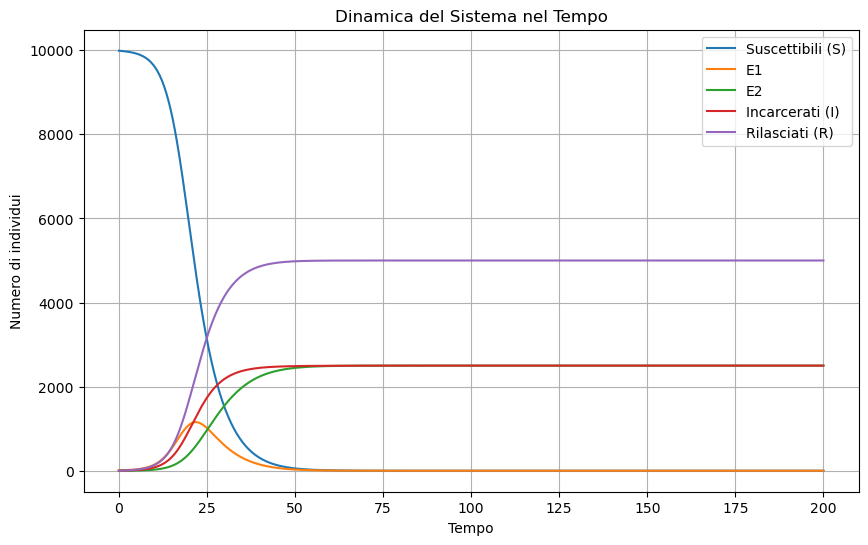

In [80]:
#R0>1 E B10=0 (mi aspetto che: cresce esponenzialmente E1 e poi si ferma nello stato stazionario (in questo caso, che ho popolazione costante, il livello E1 tende poi a zero perchè ad un certo punto i suscettibili finiscono), nota che se E1 parte da 0 il sistema non parte proprio, si resta fermi al DFE)
# Parametri
Lambda = 0
beta11 = 0.7
beta10 = 0
d = 0
theta1 = 0.2
gamma1 = 0.3
theta3 = 0.1
theta2 = 0.1
gamma3 = 0.1
gamma2 = 0.1
delta = 0

# Condizioni iniziali
S0 = 9990
E1_0 = 10
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


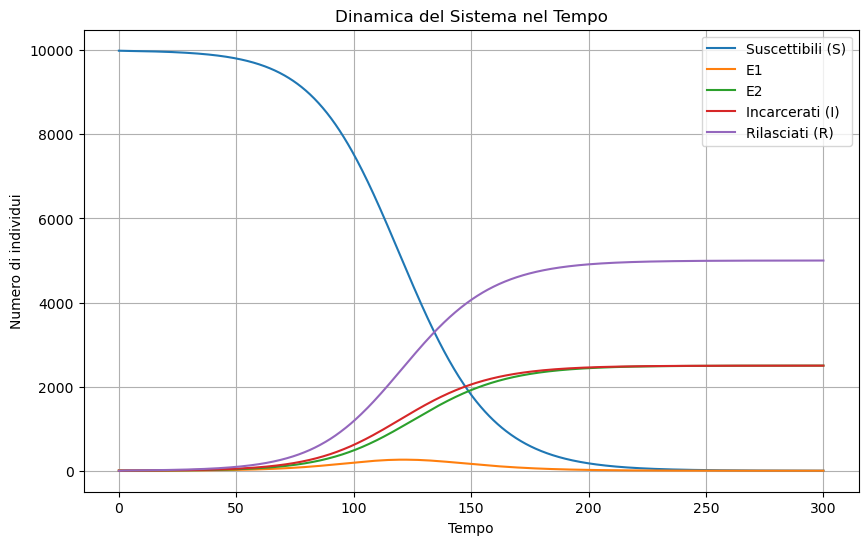

In [81]:
#R0<1 E B10=0 (mi aspetto che E1 tenda a 0 e basta)
# Parametri
Lambda = 0
beta11 = 0.2
beta10 = 0
d = 0
theta1 = 0.2
gamma1 = 0.3
theta3 = 0.1
theta2 = 0.1
gamma3 = 0.1
gamma2 = 0.1
delta = 0

# Condizioni iniziali
S0 = 9990
E1_0 = 10
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 300 unità di tempo
t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


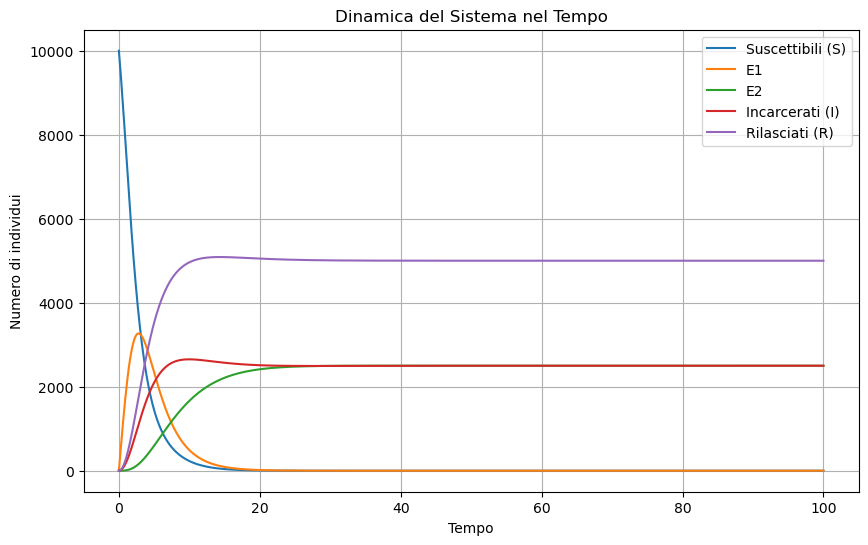

In [82]:
#R0>1 E B10 DIVERSO DA 0 (mi aspetto che anche se R0 è piccolo e anche se E1 parte da 0 cresce ad un valore positivo, ma in questo caso ho popolazione costante, quindi finirà a 0 per mancanza di ricarico)
# Parametri
Lambda = 0
beta11 = 0.7
beta10 = 0.2
d = 0
theta1 = 0.2
gamma1 = 0.3
theta3 = 0.1
theta2 = 0.1
gamma3 = 0.1
gamma2 = 0.1
delta = 0

# Condizioni iniziali
S0 = 10000
E1_0 = 0
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 100 unità di tempo
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


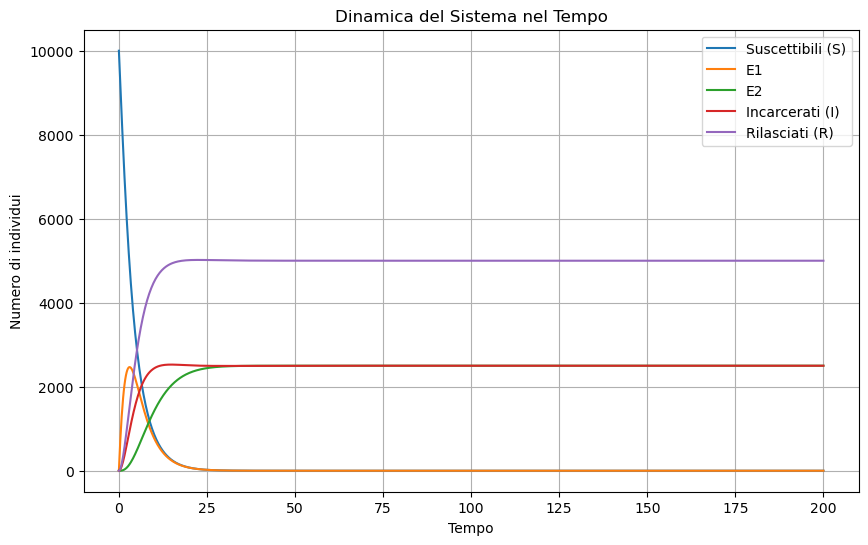

In [83]:
#R0<1 MA B10 DIVERSO DA 0
# Parametri
Lambda = 0
beta11 = 0.2
beta10 = 0.2
d = 0
theta1 = 0.2
gamma1 = 0.3
theta3 = 0.1
theta2 = 0.1
gamma3 = 0.1
gamma2 = 0.1
delta = 0

# Condizioni iniziali
S0 = 10000
E1_0 = 0
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


Ora considero la popolazione non fissa ma costante nel tempo

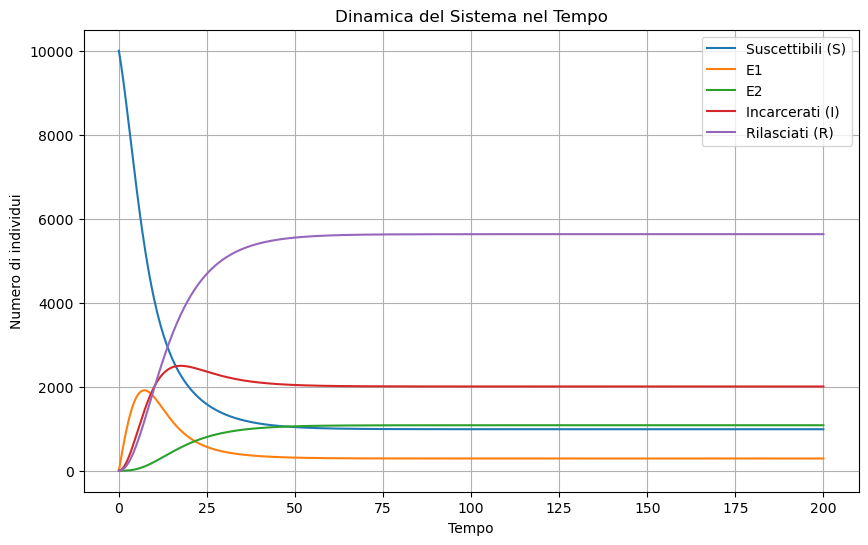

In [84]:
#Valuto l'evoluzione temporale del sistema quando considero il modello con demografia (con il tasso di nascita uguale a quella di morte)
# Parametri
Lambda = 0.01
beta11 = 0.3
beta10 = 0.05
d = 0.01
theta1 = 0.2
gamma1 = 0.1
theta3 = 0.05
theta2 = 0.15
gamma3 = 0.1
gamma2 = 0.1
delta = 0

# Condizioni iniziali
S0 = 10000
E1_0 = 0
E2_0 = 0
I0 = 0
R0_val = 0
y0 = [S0, E1_0, E2_0, I0, R0_val]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


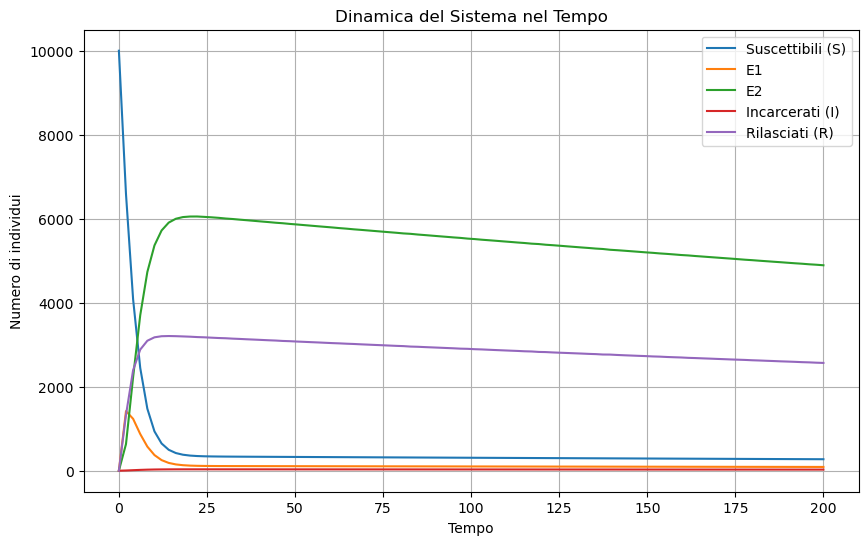

In [85]:
#Considero il sistema utilizzando i dati forniti dagli autori dell'articolo
# Parametri
Lambda  = 0.012
beta11  = 0.24
beta10  = 0.18
d       = 0.0132
theta1  = 0.0035
gamma1  = 0.9933
theta3  = 0.6666
theta2  = 0.0044
gamma3  = 0.3334
gamma2  = 0.794
delta   = 0.0033

# Condizioni iniziali
S0 = 10000
E1_0 = 0
E2_0 = 0
I0 = 0
R0_val = 0
y0 = [S0, E1_0, E2_0, I0, R0_val]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 100)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


In [86]:
#Calcolo degli stati stazionari, considerando il caso in cui il flusso esogeno da S a E1 sia nullo e non (questo verifica anche il conto analitico)
# Parametri
Lambda  = 0.01
beta11  = 0.24
beta10  = 0.18
d       = 0.01
theta1  = 0.0035
gamma1  = 0.9933
theta3  = 0.6666
theta2  = 0.0044
gamma3  = 0.3334
gamma2  = 0.794
delta   = 0.0033
delta   = 0
N = 10000

# Definizione delle costanti
A = d + theta1 + gamma1
B = theta2 + gamma3 + d
C = gamma2 + delta + d
D = theta3 + d

# Sistema di equazioni per l'equilibrio
def equilibrium(vars):
    S, E1, E2, I, R = vars
    N = S + E1 + E2 + I + R
    eq1 = Lambda * N - beta11*(S*(E1+E2))/N - (beta10+d)*S
    eq2 = beta11*(S*(E1+E2))/N + beta10*S - A*E1
    eq3 = theta3*R - B*E2
    eq4 = theta1*E1 + theta2*E2 - C*I
    eq5 = gamma1*E1 + gamma2*I + gamma3*E2 - D*R
    return [eq1, eq2, eq3, eq4, eq5]

# Caso 1: Riproviamo con beta10 > 0 (stato endemico)
initial_guess = [1, 0.1, 0.1, 0.1, 0.1]
endemic_sol = fsolve(equilibrium, initial_guess)
S_star, E1_star, E2_star, I_star, R_star = endemic_sol

print("Equilibrio endemico (beta10 > 0):")
print("S =", S_star)
print("E1 =", E1_star)
print("E2 =", E2_star)
print("I =", I_star)
print("R =", R_star)

# Caso 2: Se volessimo un DFE, poniamo beta10=0
beta10 = 0  # Modifichiamo il parametro
def equilibrium_DFE(vars):
    S, E1, E2, I, R = vars
    N = S + E1 + E2 + I + R
    eq1 = Lambda * N - beta11*(S*(E1+E2))/N - (beta10+d)*S
    eq2 = beta11*(S*(E1+E2))/N + beta10*S - A*E1
    eq3 = theta3*R - B*E2
    eq4 = theta1*E1 + theta2*E2 - C*I
    eq5 = gamma1*E1 + gamma2*I + gamma3*E2 - D*R
    return [eq1, eq2, eq3, eq4, eq5]

# Con beta10=0, l'equilibrio DFE classico è atteso:
# DFE: S = Lambda/d, E1=E2=I=R=0.
initial_guess_dfe = [Lambda * N/d, 0, 0, 0, 0]
dfe_sol = fsolve(equilibrium_DFE, initial_guess_dfe)
S_dfe, E1_dfe, E2_dfe, I_dfe, R_dfe = dfe_sol

print("\nDisease Free Equilibrium (con beta10 = 0):")
print("S =", S_dfe)
print("E1 =", E1_dfe)
print("E2 =", E2_dfe)
print("I =", I_dfe)
print("R =", R_dfe)


Equilibrio endemico (beta10 > 0):
S = 0.010081224038000842
E1 = 0.0033380129588625822
E2 = 0.21785829955543998
I = 0.0012067905017412368
R = 0.11366804168224126

Disease Free Equilibrium (con beta10 = 0):
S = 10000.0
E1 = 0.0
E2 = 0.0
I = 0.0
R = 0.0


In [87]:
#Calcolo dell'R0 con il metodo della NGM con i dati dell'articolo
# Parametri
Lambda  = 0.0132
beta11  = 0.24
beta10  = 0.18
d       = 0.012
theta1  = 0.0035
gamma1  = 0.9933
theta3  = 0.6666
theta2  = 0.0044
gamma3  = 0.3334
gamma2  = 0.794
delta   = 0.0033


def next_generation_matrix():
    # Matrice di trasmissione (F)
    F = np.array([
        [beta11, beta11],
        [0, 0]
    ])
    
    # Matrice di transizione (V)
    V = np.array([
        [d + theta1 + gamma1, 0],
        [-theta3, d + theta2 + gamma3]
    ])
    
    # Calcoliamo R0 come il massimo autovalore della matrice FV^-1
    V_inv = np.linalg.inv(V)
    FV_inv = np.dot(F, V_inv)
    eigvals = np.linalg.eigvals(FV_inv)
    R0 = max(eigvals)
    
    return R0.real

# Calcola R0
R0_value = next_generation_matrix()
print(f"Valore di R0: {R0_value:.4f}")

Valore di R0: 0.6913


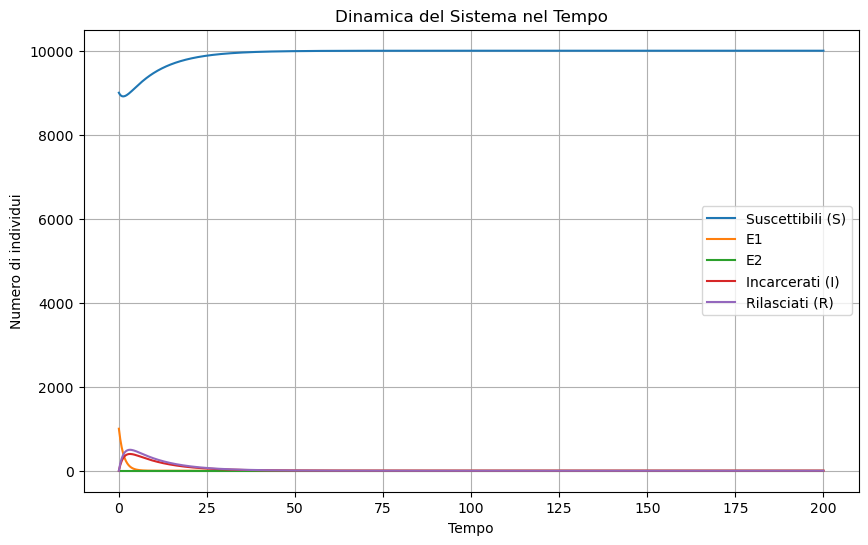

In [88]:
#R0<1 e B10=0 (MI ASPETTO CHE E1 CHE TENDE A 0 e se E1=0 il sistema resta fermo al DFE)
# Parametri
Lambda = 0.1
beta11 = 0.3
beta10 = 0
d = 0.1
theta1 = 0.4
gamma1 = 0.5
theta3 = 0
theta2 = 0
gamma3 = 0
gamma2 = 0
delta = 0

# Condizioni iniziali
S0 = 9000
E1_0 = 1000
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")
#VEDO CHE PARTO CON 1000 INFETTI E VISTO CHE R0 E' MINORE DI 1 VANNO POI A ZERO

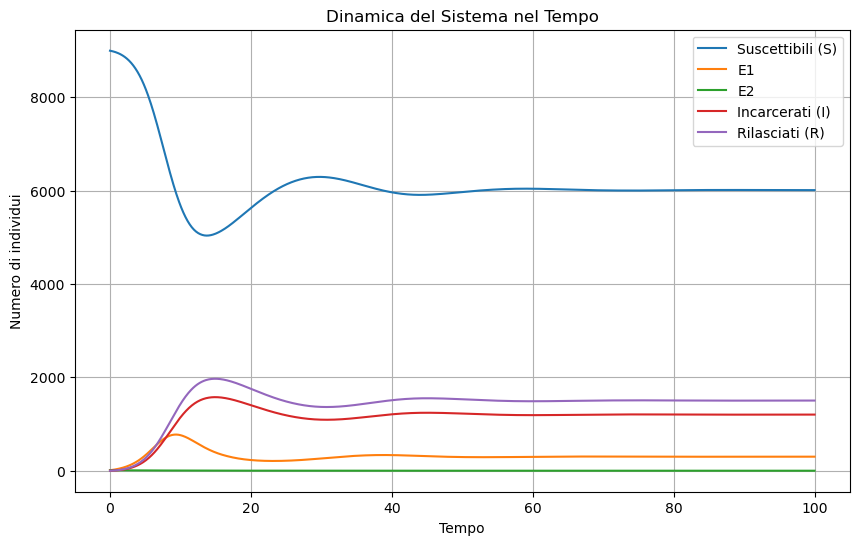

In [89]:
#R0>1 e b10=0 (mi aspetto che E1 cresca e poi si fermi allo stato stazionario) (SE E1=0 DFE)
# Parametri
Lambda = 0.1
beta11 = 1.5
beta10 = 0
d = 0.1
theta1 = 0.4
gamma1 = 0.5
theta3 = 0
theta2 = 0
gamma3 = 0
gamma2 = 0
delta = 0

# Condizioni iniziali
S0 = 9000
E1_0 = 10
E2_0 = 10
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 100 unità di tempo
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")
#VEDO CHE PARTO CON 1000 INFETTI E VISTO CHE R0 E' MINORE DI 1 VANNO POI A ZERO

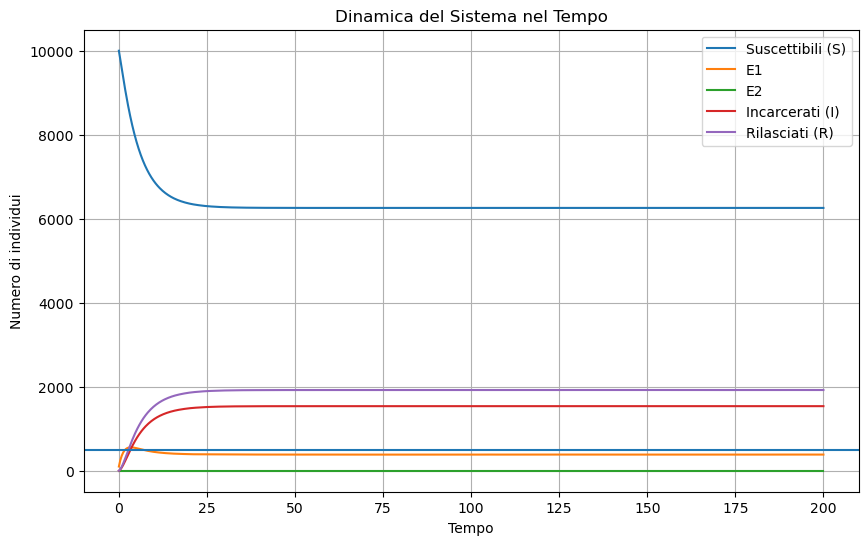

In [90]:
## RO<1 MA B10 DIVERSO DA 0. MI ASPETTO CHE E1 NON TENDa A 0 MA AD UN VALORE STAZIONARIO (ANCHE SE PARTE DA E1=0)
#questo conferma anche il risultato ottenuto analiticamente (si veda la lina orizzontale)
# Parametri
Lambda = 0.1
beta11 = 0.3
beta10 = 0.05
d = 0.1
theta1 = 0.4
gamma1 = 0.5
theta3 = 0
theta2 = 0
gamma3 = 0
gamma2 = 0
delta = 0

# Condizioni iniziali
S0 = 10000
E1_0 = 100
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.axhline((beta10 * N)/(d+theta1+gamma1))
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")


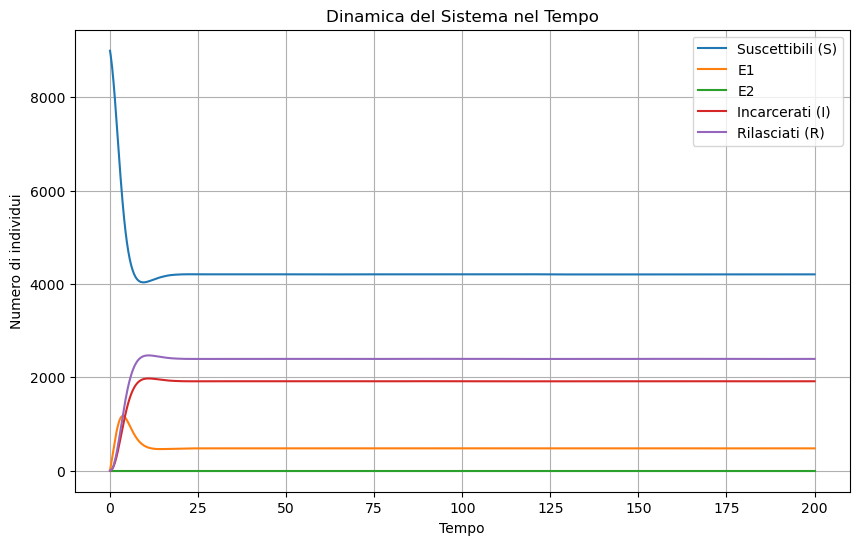

In [91]:
#R0>1 e B10 diverso da 0..  
# Parametri
Lambda = 0.1
beta11 = 1.2
beta10 = 0.05
d = 0.1
theta1 = 0.4
gamma1 = 0.5
theta3 = 0
theta2 = 0
gamma3 = 0
gamma2 = 0
delta = 0

# Condizioni iniziali
S0 = 9000
E1_0 = 0
E2_0 = 0
I0 = 0
R0 = 0
y0 = [S0, E1_0, E2_0, I0, R0]

# Definizione del sistema (con N = S+E1+E2+I+R)
def crime_system(t, y):
    S, E1, E2, I, R = y
    N = S + E1 + E2 + I + R
    dSdt  = Lambda * N - beta11 * S * (E1 + E2) / N - (beta10 + d) * S
    dE1dt = beta11 * S * (E1 + E2) / N + beta10 * S - (d + theta1 + gamma1) * E1
    dE2dt = theta3 * R - (theta2 + gamma3 + d) * E2
    dIdt  = theta1 * E1 + theta2 * E2 - (gamma2 + delta + d) * I
    dRdt  = gamma1 * E1 + gamma2 * I + gamma3 * E2 - (theta3 + d) * R
    return [dSdt, dE1dt, dE2dt, dIdt, dRdt]

# Integrazione temporale: da 0 a 200 unità di tempo
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(crime_system, t_span, y0, t_eval=t_eval, method='RK45')

if sol.success:
    t = sol.t
    S, E1, E2, I, R = sol.y
    plt.figure(figsize=(10,6))
    plt.plot(t, S, label='Suscettibili (S)')
    plt.plot(t, E1, label='E1')
    plt.plot(t, E2, label='E2')
    plt.plot(t, I, label='Incarcerati (I)')
    plt.plot(t, R, label='Rilasciati (R)')
    plt.xlabel('Tempo')
    plt.ylabel('Numero di individui')
    plt.title('Dinamica del Sistema nel Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Integrazione fallita!")